In [119]:
# multiple time series analysis
# vector autoregressive regression
# 20160724, 20160801
# Sean Chang 

In [44]:
import numpy as np
import pandas as pd
import scipy as sp
import os  
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

from datetime import datetime
import matplotlib.pyplot as plt 
#os.chdir('/home/sc268/Dropbox/codes/2016_timeseries_currency/')
#print os.getcwd()

In [ ]:
## UDFs 

def merge_ts(all_ts):
    all_ts_arr = []
    ts_id = []
    for id in all_ts.keys():
        all_ts_arr.append(all_ts[id])
        ts_id.append(id)

    df = pd.concat(all_ts_arr, join='outer', axis=1)
    df.columns = ts_id
    return df

def to_percentage_change(all_ts):
    normalized_ts = {}
    for id in all_ts.keys():
        ts = all_ts[id]
        normalized_ts[id] = (ts - ts.shift()) / ts
    return normalized_ts


def plot_corr(all_ts):
    # merge time series with shared timestamps (dates)
    df = merge_ts(all_ts)

    corr_mat = df.corr()
    sm.graphics.plot_corr(corr_mat, xnames=df.columns)
    return corr_mat

def clean_up_df(dat):
    print dat.head()
    # delete unnecessary columns
    dat = dat.ix[:, 0:4]
    
    # filter:: only consider 8 am in each day
    dat = dat.loc[[time == 80000 for time in dat['<TIME>']]].reset_index(drop=True)
    
    # create timestamp
    dat['time'] = map(lambda dd, tt: datetime.strptime(str(dd)+str(tt),'%Y%m%d%H%M%S'), dat['<DTYYYYMMDD>'], dat['<TIME>'])
    
    # rename 
    dat.rename(columns={'<TICKER>':'currency', '<OPEN>':'rate'}, inplace=True)
    
    # delete unused columns
    del dat['<DTYYYYMMDD>'], dat['<TIME>']
    
    print dat.head()
    return dat


### Data clean up / create sample data

In [ ]:
# data filter
# raw data is from http://www.forextester.com/data/datasources

usdjpy =pd.read_csv('raw_data/USDJPY.txt')
usdjpy = clean_up_df(usdjpy)
#usdjpy.to_csv('new_usdjpy.csv')

import os
foldername = "raw_data/"

for file in os.listdir(foldername):
    filename = os.path.splitext(file)[0]
    print file, filename
    dat = pd.read_csv('raw_data/' + file)
    dat = clean_up_df(dat)
    dat.to_csv('data/' + filename + '.csv')

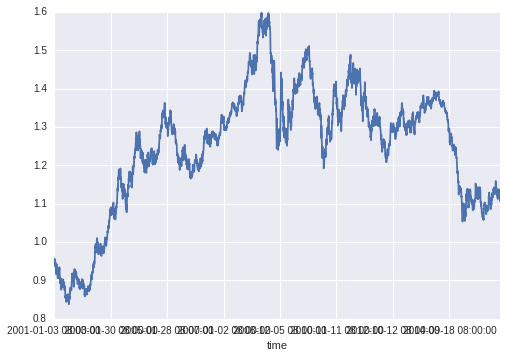

In [3]:
dat = pd.read_csv('data/EURUSD.csv')
EUR = pd.Series(list(dat.rate), index = dat.time)
EUR.plot()

In [4]:
dat = pd.read_csv('data/AUDUSD.csv')
AUD = pd.Series(list(dat.rate), index = dat.time)
AUD.plot()

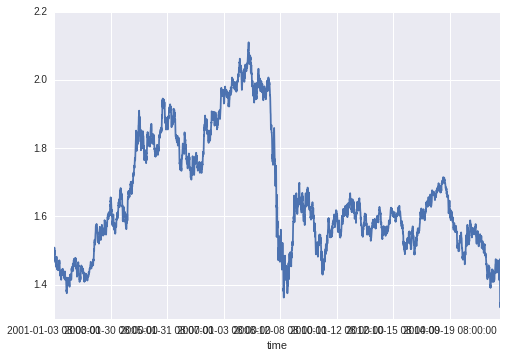

In [5]:
dat = pd.read_csv('data/GBPUSD.csv')
GBP = pd.Series(list(dat.rate), index = dat.time)
GBP.plot()

In [6]:
dat = pd.read_csv('data/NZDUSD.csv')
NZD= pd.Series(list(dat.rate), index = dat.time)
NZD.plot()

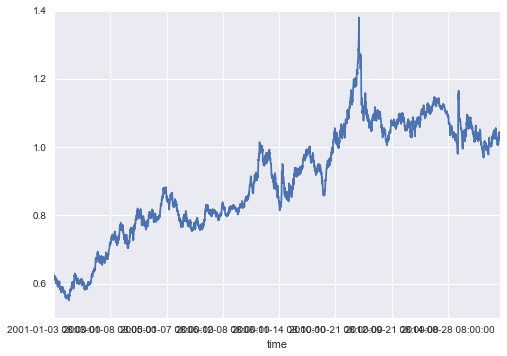

In [15]:
dat = pd.read_csv('data/CHFUSD.csv')
#dat.rate = [1.0/rate for rate in dat.rate]
#dat.to_csv('data/CHFUSD.csv', index = False)
CHF= pd.Series(list(dat.rate), index = dat.time)
CHF.plot()

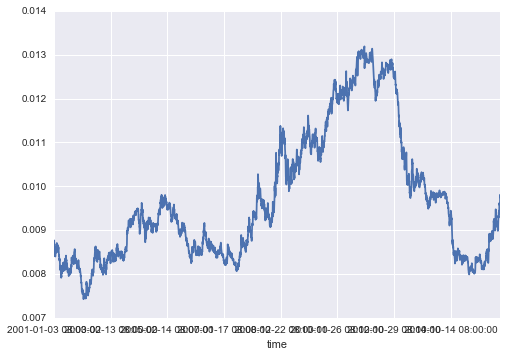

In [14]:
dat = pd.read_csv('data/JPYUSD.csv')
#dat.rate = [1.0/rate for rate in dat.rate]
#dat.to_csv('data/JPYUSD.csv', index = False)
JPY= pd.Series(list(dat.rate), index = dat.time)
JPY.plot()

### read sample data

In [32]:
def read_ts(path):
    all_ts = {}
    for file in os.listdir(path):
        if file.split('.')[1] == 'csv':
            tmp = path + '/' + file
            print tmp
            dat = pd.read_csv(path + '/' + file)  # get data
            currency = file[:3]        # get currency
            dat['day'] = pd.to_datetime(dat.time)  # change string to datatime
            dat = dat.set_index('day', drop=True)  # use day as index
            if 'Unnamed: 0' in dat.columns: del dat['Unnamed: 0']
            del dat['time'], dat.index.name, dat['currency']
            all_ts[currency] = dat  # save in a dictionary
    return all_ts
all_ts = read_ts('/Users/schang/Dropbox/codes/2016_timeseries_currency/data')
all_ts

/Users/schang/Dropbox/codes/2016_timeseries_currency/data/AUDUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/CHFUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/EURUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/GBPUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/JPYUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/NZDUSD.csv


{'AUD':                        rate
 2001-01-03 08:00:00  0.5630
 2001-01-04 08:00:00  0.5603
 2001-01-05 08:00:00  0.5698
 2001-01-08 08:00:00  0.5691
 2001-01-10 08:00:00  0.5578
 2001-01-11 08:00:00  0.5544
 2001-01-12 08:00:00  0.5616
 2001-01-15 08:00:00  0.5514
 2001-01-16 08:00:00  0.5569
 2001-01-17 08:00:00  0.5546
 2001-01-18 08:00:00  0.5560
 2001-01-19 08:00:00  0.5611
 2001-01-22 08:00:00  0.5566
 2001-01-23 08:00:00  0.5556
 2001-01-25 08:00:00  0.5431
 2001-01-26 08:00:00  0.5455
 2001-01-29 08:00:00  0.5432
 2001-01-30 08:00:00  0.5439
 2001-01-31 08:00:00  0.5467
 2001-02-01 08:00:00  0.5504
 2001-02-02 08:00:00  0.5549
 2001-02-05 08:00:00  0.5526
 2001-02-06 08:00:00  0.5502
 2001-02-07 08:00:00  0.5480
 2001-02-08 08:00:00  0.5431
 2001-02-09 08:00:00  0.5358
 2001-02-12 08:00:00  0.5383
 2001-02-13 08:00:00  0.5357
 2001-02-14 08:00:00  0.5300
 2001-02-15 08:00:00  0.5266
 ...                     ...
 2016-05-20 08:00:00  0.7239
 2016-05-23 08:00:00  0.7222
 2016-0

### Visualization 

In [49]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.charts import TimeSeries
#from bokeh.models import Range1d
from IPython.display import display
from subprocess import call
TOOLS = "pan, box_zoom, reset, save, box_select"
output_notebook()

Loading BokehJS ...

In [62]:
df = merge_ts(all_ts)
df.plot()

In [110]:
all_ts = read_ts('/Users/schang/Dropbox/codes/2016_timeseries_currency/data')
df = merge_ts(all_ts)
df['Date'] = df.index
df = df.reset_index(drop= True)
df.columns

/Users/schang/Dropbox/codes/2016_timeseries_currency/data/AUDUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/CHFUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/EURUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/GBPUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/JPYUSD.csv
/Users/schang/Dropbox/codes/2016_timeseries_currency/data/NZDUSD.csv


Index([u'AUD', u'CHF', u'JPY', u'GBP', u'NZD', u'EUR', u'Date'], dtype='object')

In [111]:
p = TimeSeries(df, x= 'Date', legend=True,
               title="Exchange rate", ylabel='exchange rates')
show(p)

### Modelling

In [48]:
# smoother
from statsmodels.nonparametric.smoothers_lowess import lowess

ts = all_ts['JPY']
ts.plot()

def smooth_ts(ts):
    all_ts_smoothed = {} 
    filtered = lowess(list(ts.rate), range(len(ts)), is_sorted=True, frac=0.05, it=0)
    return pd.Series(filtered[:,1], index = ts.index)

ts_smoothed = smooth_ts(ts)
ts_smoothed.plot()

AUD       CHF       JPY       GBP       NZD       EUR
AUD  1.000000  0.835758  0.761035  0.145462  0.855457  0.759437
CHF  0.835758  1.000000  0.653729 -0.063116  0.732875  0.640380
JPY  0.761035  0.653729  1.000000 -0.176444  0.420416  0.546724
GBP  0.145462 -0.063116 -0.176444  1.000000  0.009755  0.545300
NZD  0.855457  0.732875  0.420416  0.009755  1.000000  0.432331
EUR  0.759437  0.640380  0.546724  0.545300  0.432331  1.000000

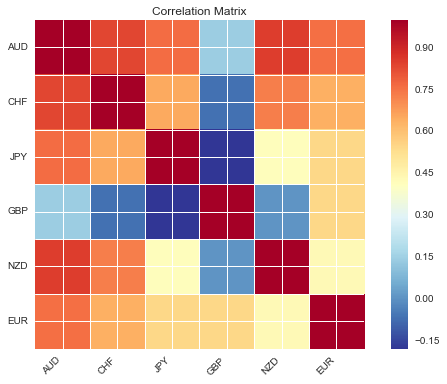

In [38]:
import statsmodels.api as sm

# pair-wise correlation
plot_corr(all_ts)


In [39]:
from statsmodels.tsa.vector_ar import var_model
from statsmodels.nonparametric.smoothers_lowess import lowess

df = merge_ts(all_ts)
model = var_model.VAR(df, missing= 'drop')
res = model.fit(5)

In [40]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Aug, 2016
Time:                     17:24:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -70.6532
Nobs:                     3310.00    HQIC:                  -70.8735
Log likelihood:           89504.7    FPE:                1.46792e-31
AIC:                     -70.9963    Det(Omega_mle):     1.38807e-31
--------------------------------------------------------------------
Results for equation AUD
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.002320         0.003017            0.769           0.442
L1.AUD         0.921409         0.033702           27.340           0.000
L1.CHF        -0.010641         0.024587           -0.433           0.665
L1.JPY         1

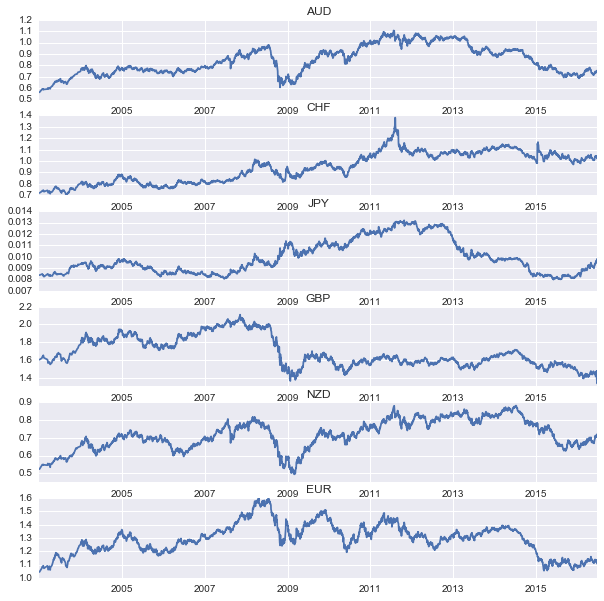

In [41]:
res.plot()

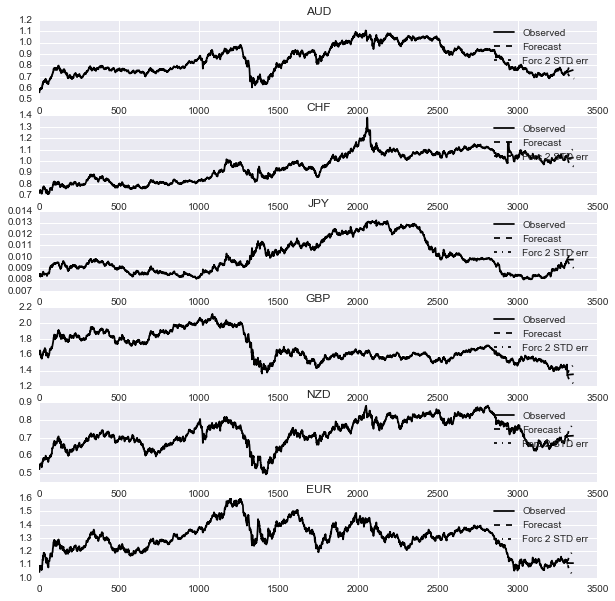

In [43]:
res.plot_forecast(40)